<a href="https://colab.research.google.com/github/kanri3/deep_learning_day1_day2/blob/main/2_2_optimizer_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Googleドライブのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/DNN_code')
# sys.path.append('/content/drive/My Drive/DNN_code/lesson_2')

# optimizer

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from common.multi_layer_net import MultiLayerNet
# from multi_layer_net import MultiLayerNet
import copy

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network_init = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
plot_interval=100
epsilon = 1e-7

# グラフ
def draw_graph(title, legend_position):
# def draw_graph(accuracies_train, accuracies_test, legend_position):
    lists = range(0, iters_num, plot_interval)
    plt.plot(lists, accuracies_train, label="training set")
    plt.plot(lists, accuracies_test,  label="test set")
    plt.legend(loc = legend_position)
    # plt.legend(loc="lower right")
    plt.title(title)
    plt.xlabel("count")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    # グラフの表示
    plt.show()

データ読み込み完了


## SGD

Generation: 100. 正答率(トレーニング) = 0.08
                : 100. 正答率(テスト) = 0.1135
Generation: 200. 正答率(トレーニング) = 0.13
                : 200. 正答率(テスト) = 0.1135
Generation: 300. 正答率(トレーニング) = 0.1
                : 300. 正答率(テスト) = 0.1135
Generation: 400. 正答率(トレーニング) = 0.15
                : 400. 正答率(テスト) = 0.1135
Generation: 500. 正答率(トレーニング) = 0.12
                : 500. 正答率(テスト) = 0.1135
Generation: 600. 正答率(トレーニング) = 0.05
                : 600. 正答率(テスト) = 0.1135
Generation: 700. 正答率(トレーニング) = 0.11
                : 700. 正答率(テスト) = 0.1135
Generation: 800. 正答率(トレーニング) = 0.08
                : 800. 正答率(テスト) = 0.1135
Generation: 900. 正答率(トレーニング) = 0.06
                : 900. 正答率(テスト) = 0.1135
Generation: 1000. 正答率(トレーニング) = 0.12
                : 1000. 正答率(テスト) = 0.1135


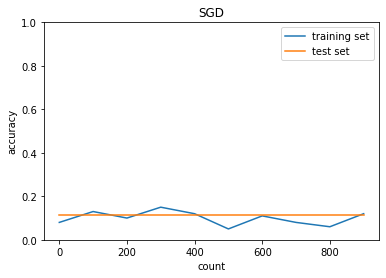

In [ ]:
network = copy.deepcopy(network_init)
train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

# グラフ
draw_graph("SGD", "upper right")

## Momentum

Generation: 100. 正答率(トレーニング) = 0.19
                : 100. 正答率(テスト) = 0.1028
Generation: 200. 正答率(トレーニング) = 0.13
                : 200. 正答率(テスト) = 0.1135
Generation: 300. 正答率(トレーニング) = 0.1
                : 300. 正答率(テスト) = 0.1135
Generation: 400. 正答率(トレーニング) = 0.09
                : 400. 正答率(テスト) = 0.098
Generation: 500. 正答率(トレーニング) = 0.1
                : 500. 正答率(テスト) = 0.1135
Generation: 600. 正答率(トレーニング) = 0.06
                : 600. 正答率(テスト) = 0.1135
Generation: 700. 正答率(トレーニング) = 0.08
                : 700. 正答率(テスト) = 0.1135
Generation: 800. 正答率(トレーニング) = 0.08
                : 800. 正答率(テスト) = 0.1135
Generation: 900. 正答率(トレーニング) = 0.08
                : 900. 正答率(テスト) = 0.0958
Generation: 1000. 正答率(トレーニング) = 0.09
                : 1000. 正答率(テスト) = 0.101


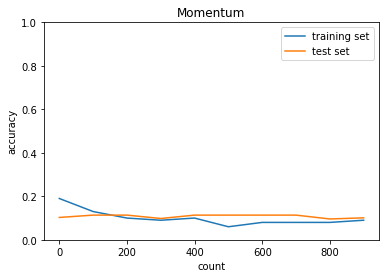

In [ ]:
network = copy.deepcopy(network_init)
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            # zeros_like(a)：aと同様のshapeを持つ、0を要素とするndarrayが返される。
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

# グラフ
draw_graph("Momentum", "upper right")

## AdaGrad

Generation: 200. 正答率(トレーニング) = 0.26
                : 200. 正答率(テスト) = 0.2077
Generation: 400. 正答率(トレーニング) = 0.19
                : 400. 正答率(テスト) = 0.2298
Generation: 600. 正答率(トレーニング) = 0.24
                : 600. 正答率(テスト) = 0.2665
Generation: 800. 正答率(トレーニング) = 0.34
                : 800. 正答率(テスト) = 0.3229
Generation: 1000. 正答率(トレーニング) = 0.48
                : 1000. 正答率(テスト) = 0.3855
Generation: 1200. 正答率(トレーニング) = 0.36
                : 1200. 正答率(テスト) = 0.4076
Generation: 1400. 正答率(トレーニング) = 0.41
                : 1400. 正答率(テスト) = 0.469
Generation: 1600. 正答率(トレーニング) = 0.66
                : 1600. 正答率(テスト) = 0.5367
Generation: 1800. 正答率(トレーニング) = 0.5
                : 1800. 正答率(テスト) = 0.5582
Generation: 2000. 正答率(トレーニング) = 0.65
                : 2000. 正答率(テスト) = 0.5682


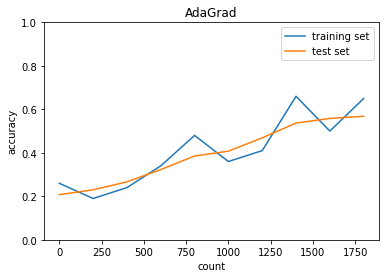

100

In [ ]:
network = copy.deepcopy(network_init)

train_loss_list = []
accuracies_train = []
accuracies_test = []
iters_num = 2000
plot_interval = 200

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        # 変更
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] += grad[key] ** 2
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + epsilon)
        # ===========================================
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

# グラフ
draw_graph("AdaGrad", "upper right")

iters_num = 1000
plot_interval = 100

## RMSProp

Generation: 100. 正答率(トレーニング) = 0.6
                : 100. 正答率(テスト) = 0.5083
Generation: 200. 正答率(トレーニング) = 0.74
                : 200. 正答率(テスト) = 0.7322
Generation: 300. 正答率(トレーニング) = 0.87
                : 300. 正答率(テスト) = 0.8449
Generation: 400. 正答率(トレーニング) = 0.93
                : 400. 正答率(テスト) = 0.8907
Generation: 500. 正答率(トレーニング) = 0.91
                : 500. 正答率(テスト) = 0.8988
Generation: 600. 正答率(トレーニング) = 0.95
                : 600. 正答率(テスト) = 0.9056
Generation: 700. 正答率(トレーニング) = 0.93
                : 700. 正答率(テスト) = 0.9025
Generation: 800. 正答率(トレーニング) = 0.99
                : 800. 正答率(テスト) = 0.9178
Generation: 900. 正答率(トレーニング) = 0.97
                : 900. 正答率(テスト) = 0.9198
Generation: 1000. 正答率(トレーニング) = 0.99
                : 1000. 正答率(テスト) = 0.9265


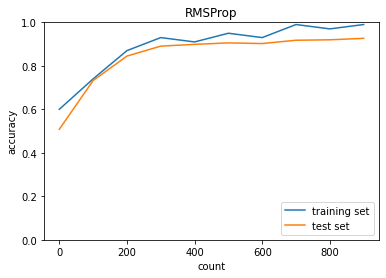

In [ ]:
network = copy.deepcopy(network_init)
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []
iters_num = 1000
plot_interval = 100

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + epsilon)
        # network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

# グラフ
draw_graph("RMSProp", "lower right")

## Adam

Generation: 100. 正答率(トレーニング) = 0.38
                : 100. 正答率(テスト) = 0.327
Generation: 200. 正答率(トレーニング) = 0.68
                : 200. 正答率(テスト) = 0.6393
Generation: 300. 正答率(トレーニング) = 0.92
                : 300. 正答率(テスト) = 0.8906
Generation: 400. 正答率(トレーニング) = 0.89
                : 400. 正答率(テスト) = 0.917
Generation: 500. 正答率(トレーニング) = 0.89
                : 500. 正答率(テスト) = 0.9279
Generation: 600. 正答率(トレーニング) = 0.97
                : 600. 正答率(テスト) = 0.9346
Generation: 700. 正答率(トレーニング) = 0.98
                : 700. 正答率(テスト) = 0.9364
Generation: 800. 正答率(トレーニング) = 0.97
                : 800. 正答率(テスト) = 0.9418
Generation: 900. 正答率(トレーニング) = 0.95
                : 900. 正答率(テスト) = 0.9429
Generation: 1000. 正答率(トレーニング) = 0.94
                : 1000. 正答率(テスト) = 0.9452


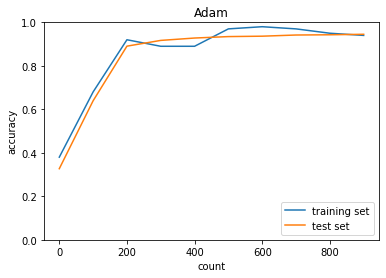

In [ ]:
network = copy.deepcopy(network_init)
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + epsilon)
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                
# グラフ
draw_graph("Adam", "lower right")